In [103]:
import csv
import pickle
import numpy as np

In [104]:
with open('articles.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)
    articles = list(reader)

len(articles)

14

In [105]:
def clean_text(text):
    text = text.lower()
    cleaned = ''
    for char in text:
        if char.isalpha() or char == ' ':
            cleaned += char
    words = cleaned.split()
    return words

In [106]:
tokenized_articles = []
for article in articles:
    words = clean_text(article[2])
    tokenized_articles.append(words)

tokenized_articles[0]

['publish',
 'ai',
 'ml',
 'datascience',
 'insights',
 'to',
 'a',
 'global',
 'community',
 'of',
 'data',
 'professionals',
 'part',
 'the',
 'risks',
 'and',
 'ethical',
 'issues',
 'associated',
 'with',
 'large',
 'language',
 'models',
 'if',
 'you',
 'havent',
 'heard',
 'about',
 'chatgpt',
 'you',
 'must',
 'be',
 'hiding',
 'under',
 'a',
 'very',
 'large',
 'rock',
 'the',
 'viral',
 'chatbot',
 'used',
 'for',
 'natural',
 'language',
 'processing',
 'tasks',
 'like',
 'text',
 'generation',
 'is',
 'hitting',
 'the',
 'news',
 'everywhere',
 'openai',
 'the',
 'company',
 'behind',
 'it',
 'was',
 'recently',
 'in',
 'talks',
 'to',
 'get',
 'a',
 'valuation',
 'of',
 'billion',
 'and',
 'microsoft',
 'may',
 'soon',
 'invest',
 'another',
 'billion',
 'chatgpt',
 'is',
 'an',
 'autoregressive',
 'language',
 'model',
 'that',
 'uses',
 'deep',
 'learning',
 'to',
 'produce',
 'text',
 'it',
 'has',
 'amazed',
 'users',
 'by',
 'its',
 'detailed',
 'answers',
 'across',
 

In [107]:
vocabulary = set()
for words in tokenized_articles:
    for word in words:
        vocabulary.add(word)

vocabulary = sorted(vocabulary)
word_to_index = {}
for i, word in enumerate(vocabulary):
    word_to_index[word] = i

len(vocabulary)

2916

In [108]:
def vectorize(words, vocabulary):
    vector = np.zeros(len(vocabulary))
    for i, word in enumerate(vocabulary):
        if word in words:
            vector[i] = 1
    return vector

In [109]:
vectors = []
for words in tokenized_articles:
    vectors.append(vectorize(words, vocabulary))

vectors = np.array(vectors)
vectors.shape

(14, 2916)

In [110]:
n = len(articles)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        dot_product = np.dot(vectors[i], vectors[j])
        norm_i = np.linalg.norm(vectors[i])
        norm_j = np.linalg.norm(vectors[j])
        if norm_i == 0 or norm_j == 0:
            similarity_matrix[i][j] = 0
        else:
            similarity_matrix[i][j] = dot_product / (norm_i * norm_j)
similarity_matrix

array([[1.        , 0.30677895, 0.3012605 , 0.33179961, 0.19198245,
        0.14233671, 0.21285031, 0.20935509, 0.19614977, 0.15639113,
        0.14751472, 0.19378901, 0.30500679, 0.16112109],
       [0.30677895, 1.        , 0.32627011, 0.31650527, 0.19709099,
        0.13234761, 0.19837975, 0.19638917, 0.17670004, 0.15636428,
        0.13330772, 0.15636428, 0.34812838, 0.12391802],
       [0.3012605 , 0.32627011, 1.        , 0.38091647, 0.21098603,
        0.16364572, 0.22536762, 0.2091621 , 0.2107755 , 0.206246  ,
        0.15788748, 0.19727878, 0.39457617, 0.15397376],
       [0.33179961, 0.31650527, 0.38091647, 1.        , 0.21172912,
        0.15742422, 0.21090446, 0.18035747, 0.18160624, 0.16331156,
        0.14146747, 0.18997467, 0.40863792, 0.14421499],
       [0.19198245, 0.19709099, 0.21098603, 0.21172912, 1.        ,
        0.25048972, 0.26928498, 0.29546274, 0.28492041, 0.2583423 ,
        0.21223687, 0.24167506, 0.21004956, 0.2146417 ],
       [0.14233671, 0.13234761, 0.1

In [111]:
with open('similarities.pkl', 'wb') as f:
    pickle.dump(similarity_matrix, f)

In [112]:
def get_top_similar(article_id, articles, similarity_matrix, top_n=3):
    ids = [a[0] for a in articles]
    idx = ids.index(str(article_id))
    scores = similarity_matrix[idx].copy()
    scores[idx] = -1
    top_indices = np.argsort(scores)[::-1][:top_n]
    results = []
    for i in top_indices:
        results.append((articles[i][1], scores[i]))
    return results

In [113]:
top_3 = get_top_similar(1, articles, similarity_matrix)
print(f'Top 3 articles similar to article 1:')
for title, score in top_3:
    print(f'  {score:.4f} - {title[:80]}')

Top 3 articles similar to article 1:
  0.3318 - Going Under the Hood of Character-Level RNNs: A NumPy-based Implementation Guide
  0.3068 - Ethics in AI: Potential Root Causes for Biased Algorithms
  0.3050 - Coupon Collector’s Problem: A Probability Masterpiece


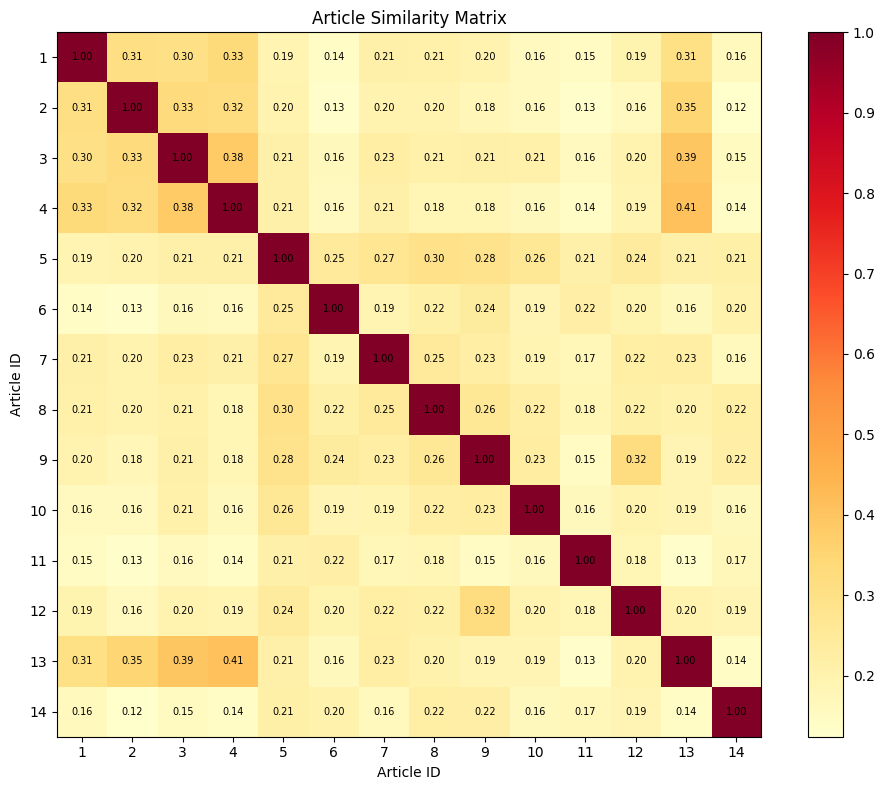

In [114]:
import matplotlib.pyplot as plt

labels = [a[0] for a in articles]

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(similarity_matrix, cmap='YlOrRd')

ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Article ID')
ax.set_ylabel('Article ID')
ax.set_title('Article Similarity Matrix')

for i in range(n):
    for j in range(n):
        ax.text(j, i, f'{similarity_matrix[i][j]:.2f}',
               ha='center', va='center', fontsize=7)

plt.colorbar(im)
plt.tight_layout()
plt.show()